## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_full = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
mouse_full.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_metadata_dd = mouse_metadata.drop_duplicates()
num_mice = mouse_metadata_dd["Mouse ID"].nunique()

print(f"Number of mice = {num_mice}")

Number of mice = 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows_mouseID_timepoint = mouse_full[mouse_full.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicate_rows_mouseID_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_full.loc[mouse_full["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_full_clean = mouse_full[mouse_full["Mouse ID"] != "g989"]


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = mouse_full_clean["Mouse ID"].nunique()
print(f"Number of mice after data cleaning = {num_mice}")

Number of mice after data cleaning = 248


## Summary Statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_regimens = mouse_full_clean["Drug Regimen"].unique()

summary_drugs_volume = pd.DataFrame(columns=["Drug","Mean","Median","Variance","Std Dev","SEM"])

for drug in drug_regimens:
    drug_subset = mouse_full_clean.loc[mouse_full_clean["Drug Regimen"] == drug, ["Tumor Volume (mm3)"]]
    drug_mean = drug_subset["Tumor Volume (mm3)"].mean()
    drug_median = drug_subset["Tumor Volume (mm3)"].median()
    drug_variance = drug_subset["Tumor Volume (mm3)"].var()
    drug_stddev = drug_subset["Tumor Volume (mm3)"].std()
    drug_sem = drug_subset["Tumor Volume (mm3)"].sem()
    
    subset_drugs_volume = pd.DataFrame(data=[[drug,drug_mean,drug_median,drug_variance,drug_stddev,drug_sem]],columns=["Drug","Mean","Median","Variance","Std Dev","SEM"])                     
    summary_drugs_volume = pd.concat([summary_drugs_volume, subset_drugs_volume], ignore_index=True)
    
summary_drugs_volume.set_index("Drug", inplace=True)

summary_drugs_volume["Mean"] = summary_drugs_volume["Mean"].map("{:,.2f}".format)
summary_drugs_volume["Median"] = summary_drugs_volume["Median"].map("{:,.2f}".format)
summary_drugs_volume["Variance"] = summary_drugs_volume["Variance"].map("{:,.2f}".format)
summary_drugs_volume["Std Dev"] = summary_drugs_volume["Std Dev"].map("{:,.2f}".format)
summary_drugs_volume["SEM"] = summary_drugs_volume["SEM"].map("{:,.2f}".format)

print("\nSummary Statistics of the Tumour Volume for Each Drug Regimen")
print("---------------------------------------------------------------")
summary_drugs_volume




Summary Statistics of the Tumour Volume for Each Drug Regimen
---------------------------------------------------------------


,Mean,Median,Variance,Std Dev,SEM
Drug,,,,,
Ramicane,40.22,40.67,23.49,4.85,0.32
Capomulin,40.68,41.56,24.95,4.99,0.33
Infubinol,52.88,51.82,43.13,6.57,0.49
Placebo,54.03,52.29,61.17,7.82,0.58
Ceftamin,52.59,51.78,39.29,6.27,0.47
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52
Ketapril,55.24,53.70,68.55,8.28,0.60
Propriva,52.32,50.45,43.85,6.62,0.54


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_stats = mouse_full_clean.groupby(["Drug Regimen"], sort=False)["Tumor Volume (mm3)"].agg(
                                                                                    Mean = 'mean',
                                                                                    Median = 'median',
                                                                                    Variance = 'var',
                                                                                    Std_Dev = 'std',
                                                                                    SEM = 'sem')
summary_stats_final = summary_stats.rename(columns = {"Std_Dev" : "Std Dev"})
summary_stats_final["Mean"] = summary_stats_final["Mean"].map("{:,.2f}".format)
summary_stats_final["Median"] = summary_stats_final["Median"].map("{:,.2f}".format)
summary_stats_final["Variance"] = summary_stats_final["Variance"].map("{:,.2f}".format)
summary_stats_final["Std Dev"] = summary_stats_final["Std Dev"].map("{:,.2f}".format)
summary_stats_final["SEM"] = summary_stats_final["SEM"].map("{:,.2f}".format)
print("\nSummary Statistics of the Tumour Volume for Each Drug Regimen")
print("---------------------------------------------------------------")
summary_stats_final



Summary Statistics of the Tumour Volume for Each Drug Regimen
---------------------------------------------------------------


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Ramicane,40.22,40.67,23.49,4.85,0.32
Capomulin,40.68,41.56,24.95,4.99,0.33
Infubinol,52.88,51.82,43.13,6.57,0.49
Placebo,54.03,52.29,61.17,7.82,0.58
Ceftamin,52.59,51.78,39.29,6.27,0.47
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52
Ketapril,55.24,53.70,68.55,8.28,0.60
Propriva,52.32,50.45,43.85,6.62,0.54


## Bar and Pie Charts

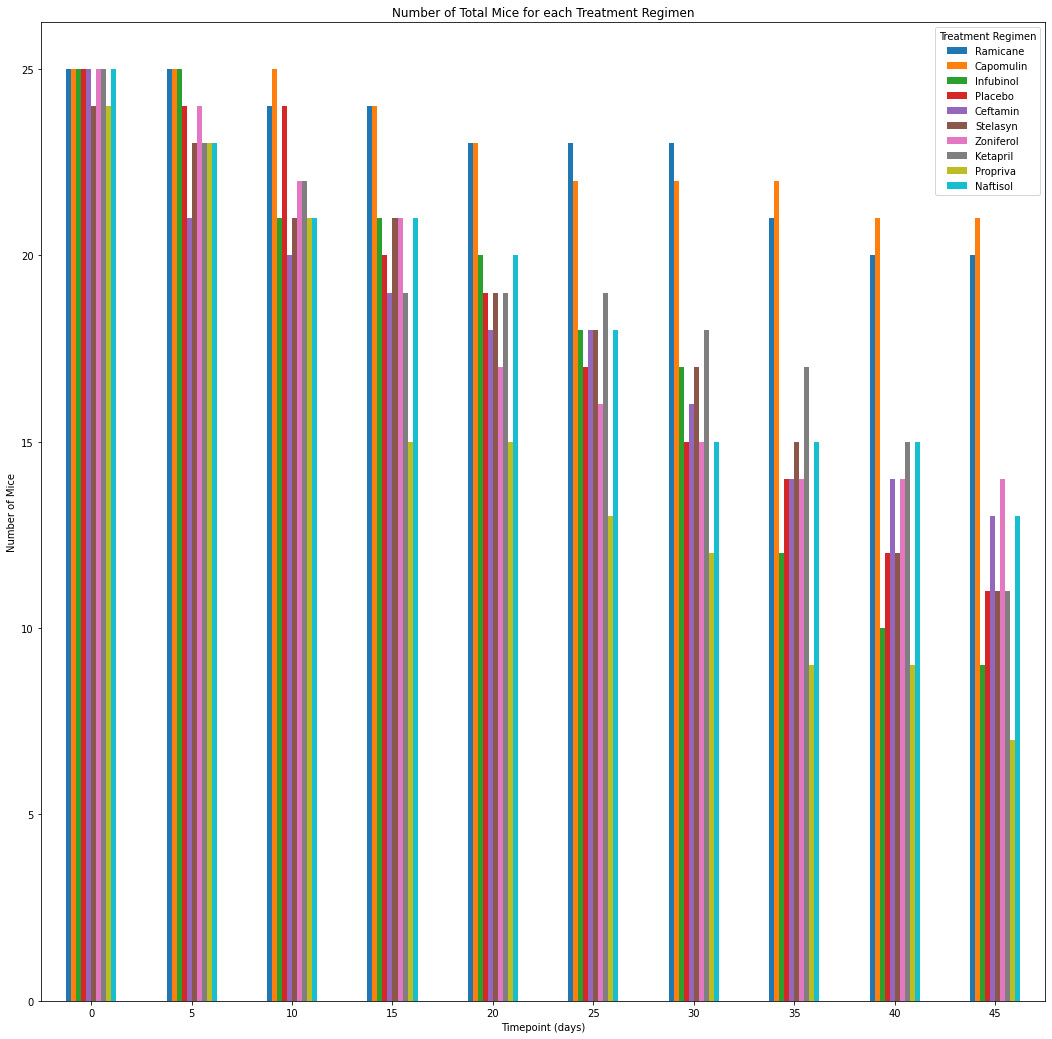

In [350]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Timepoints are 0,5,10,15,20,25,30,35,45 inclusive
# Drug Regimens are Ramicane, Capomulin, Infubinol, Placebo, Ceftamin, Stelasyn, Zoniferol, Ketapril, Propiva, Naftisol

num_mice_regimen = mouse_full_clean.groupby(["Drug Regimen", "Timepoint"], sort=False)["Mouse ID"].size()

num_mice_summary = pd.DataFrame( {
                            "Ramicane" : num_mice_regimen["Ramicane"], 
                            "Capomulin" : num_mice_regimen["Capomulin"], 
                            "Infubinol" : num_mice_regimen["Infubinol"],
                            "Placebo" : num_mice_regimen["Placebo"],
                            "Ceftamin" : num_mice_regimen["Ceftamin"],
                            "Stelasyn" : num_mice_regimen["Stelasyn"],
                            "Zoniferol" : num_mice_regimen["Zoniferol"],
                            "Ketapril" : num_mice_regimen["Ketapril"],
                            "Propriva" : num_mice_regimen["Propriva"],
                            "Naftisol" : num_mice_regimen["Naftisol"]
                            },
                           )

%matplotlib inline
ax = num_mice_summary.plot(kind="bar", figsize=(18,18), rot=0, width=0.5, title="Number of Total Mice for each Treatment Regimen", xlabel="Timepoint (days)", ylabel="Number of Mice");
# ax.set_title("Number of Total Mice for each Treatment Regimen")
# ax.set_xlabel("Timepoint (days)")
# ax.set_ylabel("Number of Mice")
plt.legend(title="Treatment Regimen")
# plt.xlim(min, max) # range on the x axis
# plt.ylim(min, max) # range on the y axis
# plt.show() 
# num_mice_summary
pass;

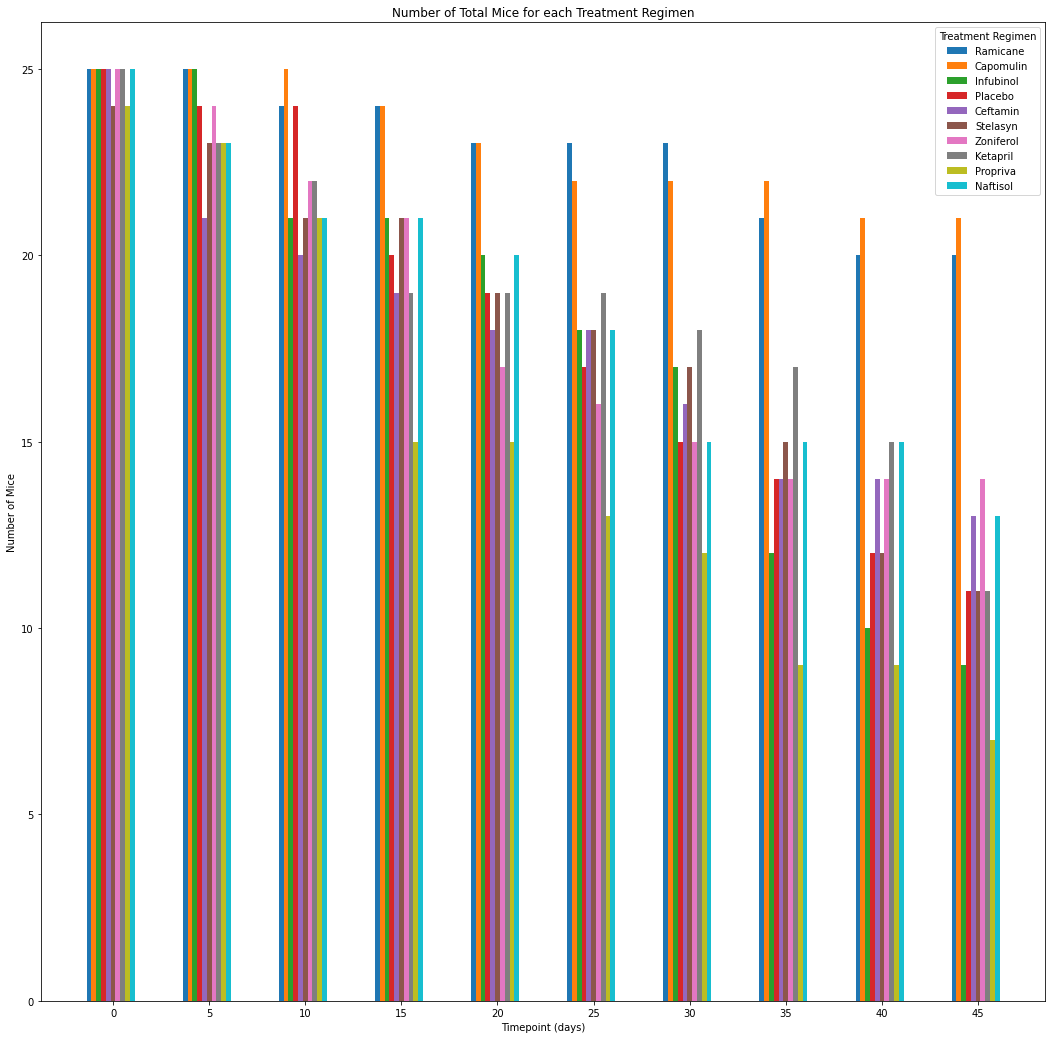

In [408]:
%matplotlib inline
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
fig, ax = plt.subplots(figsize=(18, 18))
# fig = plt.figure(figsize=(18,18))
timepoint = np.arange(0,50,5)
max_mice = 25
bar_width = 0.25
offset = [-1.25,-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]
# offset = [-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1,1.25]
for i in range(0,10):
    
    """if (i == 0):
        offset=0
    else:
        offset = i*bar_width"""
    
    data = num_mice_summary.iloc[:,[i]]
    # graph_name = f"g{i}"
    graph_name = plt.bar(timepoint+offset[i], data[drug_regimens[i]], width=bar_width)
    

ax.set_xticks(timepoint)
plt.title("Number of Total Mice for each Treatment Regimen")
plt.xlabel("Timepoint (days)")
plt.ylabel("Number of Mice")
drug_regimens = mouse_full_clean["Drug Regimen"].unique()
plt.legend(title="Treatment Regimen", labels = drug_regimens)
pass;

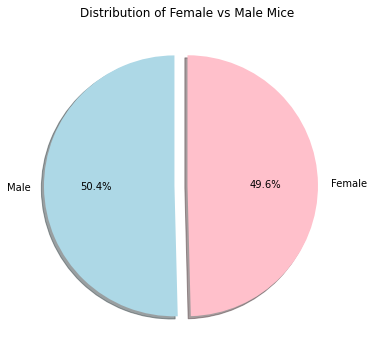

In [384]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# mouse_metadata_clean = mouse_metadata[mouse_metadata["Mouse ID"] != "g989"]
# num_mice_sex = mouse_metadata_clean.groupby(["Sex"], sort=False)["Mouse ID"].size()

num_mice_sex = mouse_full_clean.groupby(["Sex"], sort=False)["Mouse ID"].nunique()

num_mice_sex_mf = pd.DataFrame({
                                    "Number of Mice" : num_mice_sex 
                               },)

# Calulate the percentage of mice for each sex by dividing the amount in each sex by the previous num_mice
# Multiply this by 100 to convert to a percentage
# Name column Percentage of Mice
num_mice_sex_mf["Percentage of Mice"] = round(((num_mice_sex_mf["Number of Mice"] / num_mice) * 100),1)

colors = ["lightblue","pink"]
explode = (0.1,0)
ax = num_mice_sex_mf["Number of Mice"].plot(kind="pie", figsize=(6,6), explode=explode, colors=colors, shadow=True, startangle=90, title="Distribution of Female vs Male Mice", ylabel='', autopct = "%1.1f%%" );
# ax.set_title("Distribution of Female vs Male Mice")
# ax.set_ylabel('')
# Format the Percentage of Mice with percentage sign and two decimal points

# num_mice_sex_mf["Percentage of Mice"] = num_mice_sex_mf["Percentage of Mice"].map("{:.1f}%".format)
# num_mice_sex_mf


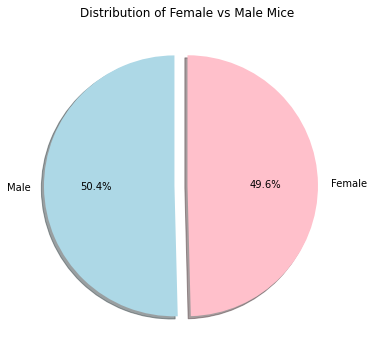

In [385]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib inline
fig = plt.figure(figsize=(6,6))
mice_labels = ["Male", "Female"]
num_mice_mf = [num_mice_sex_mf["Number of Mice"][0], num_mice_sex_mf["Number of Mice"][1]]

colors = ["lightblue","pink"]
explode = (0.1,0)
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(num_mice_mf, explode=explode, labels=mice_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Create axes which are equal so we have a perfect circle
# plt.axis("equal")
plt.title("Distribution of Female vs Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [414]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max_tp = mouse_full_clean.groupby(["Mouse ID"], sort=False)["Timepoint"].max()
mouse_max_tp
mouse_max_timepoint = pd.DataFrame({ 
                                        "Max Timepoint" : mouse_max_tp
                                   })
mouse_max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_merge_maxtp = pd.merge(mouse_full_clean, mouse_max_timepoint, how="inner", on="Mouse ID")
mouse_regimen_volume = mouse_merge_maxtp.loc[mouse_merge_maxtp["Timepoint"] == mouse_merge_maxtp["Max Timepoint"], ["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
mouse_regimen_volume.set_index("Mouse ID", inplace=True)
mouse_regimen_volume


,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
k403,Ramicane,22.050126
s185,Capomulin,23.343598
x401,Capomulin,28.484033
m601,Capomulin,28.430964
g791,Ramicane,29.128472
...,...,...
z314,Stelasyn,45.934712
z435,Propriva,48.710661
z581,Infubinol,62.754451


In [481]:
# Put treatments into a list for for loop (and later for plot labels)
regimen_top4 = [ "Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in regimen_top4:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_subset = mouse_regimen_volume.loc[mouse_regimen_volume["Drug Regimen"] == regimen, ["Tumor Volume (mm3)"]]

    tumor_data_series = tumor_subset["Tumor Volume (mm3)"]
    # add subset 
    data_list = tumor_data_series.to_list()
    tumor_volume_data[regimen] = data_list
    
tumor_volume_data_df = pd.DataFrame.from_dict(tumor_volume_data)

summary_volume_outliers = pd.DataFrame(columns=["Regimen","Lower Quartile","Upper Quartile","IQR","Median","Lower Bound","Upper Bound"])

# Determine outliers using upper and lower bounds
for regimen in regimen_top4:
        
    quartiles = tumor_volume_data_df[regimen].quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    median = round(quartiles[0.5], 2)
    iqr_full = quartiles[0.75] - quartiles[0.25]
    iqr = round((iqr_full),2)
    
    lower_bound = round((quartiles[0.25] - (1.5*iqr_full)),2)
    upper_bound = round((quartiles[0.75] + (1.5*iqr_full)),2)
    
    subset_volume_outliers = pd.DataFrame(data=[[regimen,lowerq,upperq,iqr,median,lower_bound, upper_bound]], columns=["Regimen","Lower Quartile","Upper Quartile","IQR","Median","Lower Bound","Upper Bound"])                     
    summary_volume_outliers = pd.concat([summary_volume_outliers, subset_volume_outliers], ignore_index=True)
    
summary_volume_outliers.set_index("Regimen", inplace=True)
summary_volume_outliers

,Lower Quartile,Upper Quartile,IQR,Median,Lower Bound,Upper Bound
Regimen,,,,,,
Capomulin,32.38,40.16,7.78,38.13,20.70,51.83
Ramicane,31.56,40.66,9.10,36.56,17.91,54.31
Infubinol,54.05,65.53,11.48,60.17,36.83,82.74
Ceftamin,48.72,64.30,15.58,59.85,25.36,87.67


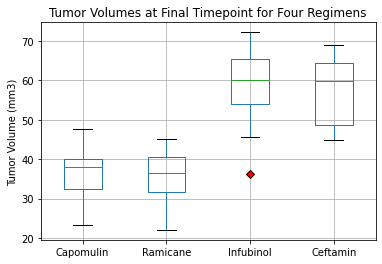

In [482]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes at Final Timepoint for Four Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
red_diamond = dict(markerfacecolor='r', marker='D')
ax = tumor_volume_data_df.boxplot(column=regimen_top4, ax=ax1, rot=0, grid=True, figsize=(16,16), flierprops=red_diamond)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
